# Data Import

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import zscore

df_master=pd.read_excel(path\Lipidomics Analysis.xlsx', sheet_name = 'D3 pg per g muscle', index_col = 0)
df_master.head()

In [33]:
df_D3 = df_master.T[0:10].T

### Quad VML lipidomics heatmaps - Control vs AT-RvD1 gel

In [ ]:
df_zscore = zscore(df_D3, axis=1, nan_policy='omit')
df_zscore.head()

,Blank,Blank.1,Blank.2,Blank.3,Blank.4,Resolvin Gel,Resolvin Gel.1,Resolvin Gel.2,Resolvin Gel.3,Resolvin Gel.4
TX,,,,,,,,,,
"10(S),17(S)-DiHDHA",0.787600,-1.065704,-1.049645,0.077254,0.343286,0.819274,2.142920,-0.856035,-0.989052,-0.209897
12(S)-HEPE,1.279459,-1.389246,-0.842010,1.661948,0.780430,0.070270,-0.171115,-0.656402,0.533023,-1.266359
12-HEPE,1.250270,-1.119194,-0.937519,2.079333,0.541233,-0.433435,-0.228258,-0.785781,0.434775,-0.801425
12-HETE,2.432376,-0.985242,-0.820318,0.884489,0.603233,-0.531844,-0.492798,-0.714155,0.118229,-0.493971
13-HDHA,1.382118,0.469586,-1.221339,1.297192,-1.638933,-0.476206,-0.063193,-0.913732,0.218215,0.946293


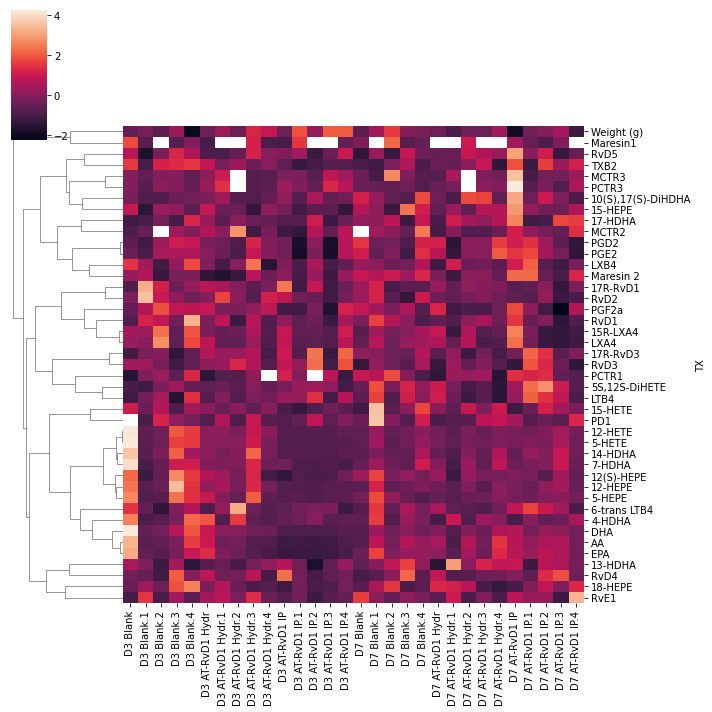

In [3]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

row_dism = 1 - df_zscore.T.corr()
row_linkage = hc.linkage(sp.distance.squareform(row_dism), method='complete')
col_dism = 1 - df_zscore.corr()
col_linkage = hc.linkage(sp.distance.squareform(col_dism), method='complete')


clust = sns.clustermap(df_zscore, col_cluster=False, yticklabels=True,row_linkage=row_linkage, col_linkage=col_linkage)

In [35]:
#Drop weights column from analysis
df_zscore = df_zscore.drop('Weight (g)')

KeyError: "['Weight (g)'] not found in axis"

In [35]:
#Calculate z-score for each sample and find mean z-score for each group
D3_blank = df_zscore[['D3 Blank', 'D3 Blank.1', 'D3 Blank.2','D3 Blank.3','D3 Blank.4']].mean(axis=1)
D3_RvGel = df_zscore[['D3 AT-RvD1 Hydr', 'D3 AT-RvD1 Hydr.1', 'D3 AT-RvD1 Hydr.2','D3 AT-RvD1 Hydr.3','D3 AT-RvD1 Hydr.4']].mean(axis=1)
D3_IP = df_zscore[['D3 AT-RvD1 IP', 'D3 AT-RvD1 IP.1', 'D3 AT-RvD1 IP.2','D3 AT-RvD1 IP.3','D3 AT-RvD1 IP.4']].mean(axis=1)

D7_blank = df_zscore[['D7 Blank', 'D7 Blank.1', 'D7 Blank.2','D7 Blank.3','D7 Blank.4']].mean(axis=1)
D7_RvGel = df_zscore[['D7 AT-RvD1 Hydr', 'D7 AT-RvD1 Hydr.1', 'D7 AT-RvD1 Hydr.2','D7 AT-RvD1 Hydr.3','D7 AT-RvD1 Hydr.4']].mean(axis=1)
D7_IP = df_zscore[['D7 AT-RvD1 IP', 'D7 AT-RvD1 IP.1', 'D7 AT-RvD1 IP.2','D7 AT-RvD1 IP.3','D7 AT-RvD1 IP.4']].mean(axis=1)

df_avg_zscore = pd.DataFrame({'D3_blank':D3_blank, 'D3_RvGel':D3_RvGel, 'D3 IP':D3_IP,'D7_blank':D7_blank, 'D7_RvGel':D7_RvGel, 'D7 IP':D7_IP })

df_avg_zscore


,D3_blank,D3_RvGel,D3 IP,D7_blank,D7_RvGel,D7 IP
TX,,,,,,
"10(S),17(S)-DiHDHA",-0.550531,-0.416300,-0.216985,0.344725,0.312640,0.526450
12(S)-HEPE,0.939393,0.172804,-0.880844,0.325779,-0.273420,-0.283712
12-HEPE,1.207263,0.260352,-0.794784,-0.127853,-0.398321,-0.146656
12-HETE,1.338676,0.157299,-0.733329,-0.254801,-0.378427,-0.129419
13-HDHA,-0.381265,-0.452683,-0.389408,0.391568,0.701153,0.130634
14-HDHA,1.034563,0.332167,-0.776576,-0.302335,-0.307629,0.019810
15R-LXA4,0.857362,-0.293278,0.018810,-0.064996,-0.235092,-0.282806
15-HEPE,-0.162363,-0.247345,-0.828095,0.582176,0.067834,0.587793
15-HETE,0.148506,-0.203586,-0.825795,0.711075,0.236691,-0.066892


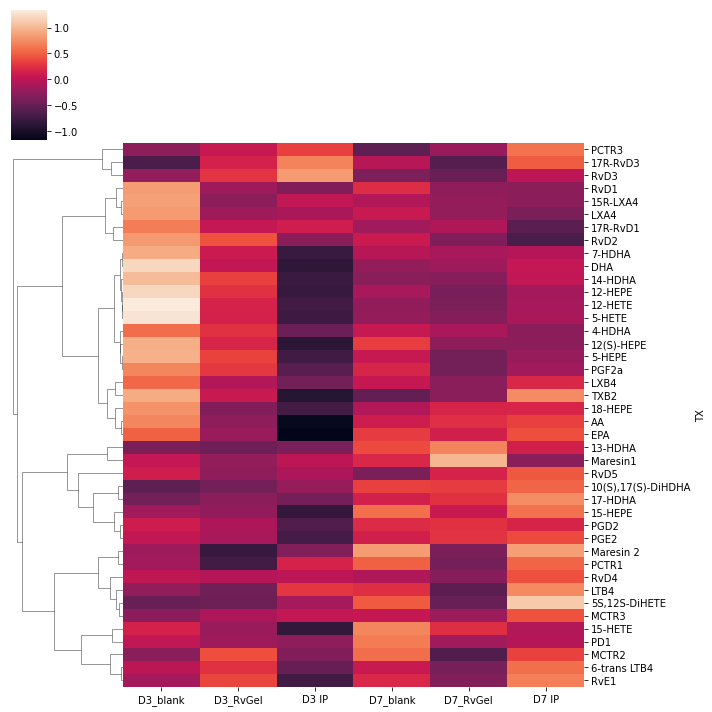

In [38]:
#Plot hierarchically clustered 'average z-score' heatmap
row_dism = 1 - df_avg_zscore.T.corr()
row_linkage = hc.linkage(sp.distance.squareform(row_dism), method='complete')
col_dism = 1 - df_avg_zscore.corr()
col_linkage = hc.linkage(sp.distance.squareform(col_dism), method='complete')
sns.clustermap(df_avg_zscore, col_cluster=False, yticklabels=True, row_linkage=row_linkage, col_linkage=col_linkage)

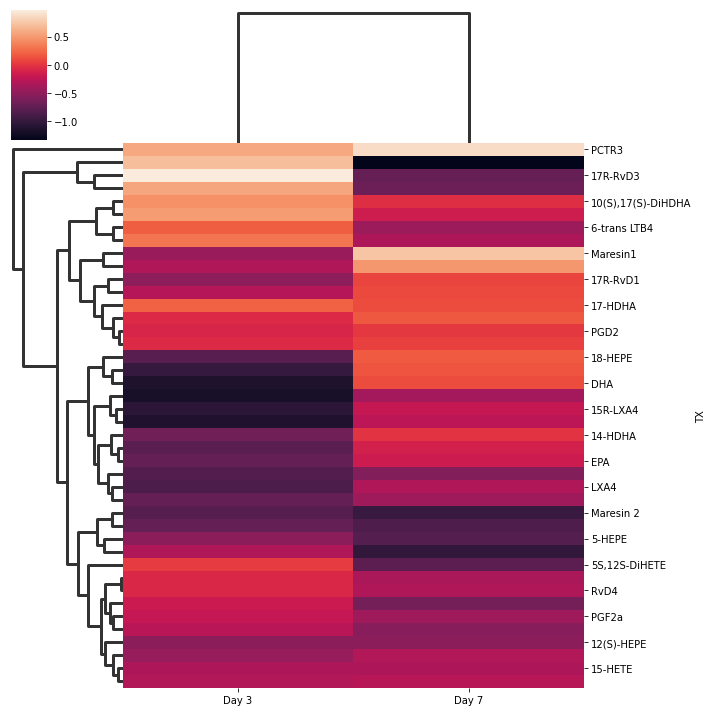

In [19]:
#import and plot hierarchically clustered Log2(Day 3/Day 7) heatmap
rvgelVSblank_log=pd.read_excel(r'C:\Users\frank\Dropbox (University of Oregon)\Nature Materials AT-RvD1 Manuscript\Analysis\Lipidomics Analysis.xlsx', sheet_name = 'rv gel log norm to blank', index_col = 0)
rvgelVSblank_log_clust = sns.clustermap(rvgelVSblank_log[['Day 3','Day 7']],tree_kws=dict(linewidths=3))

In [3]:
#Output original index of each analyte after hierarchical clustering
rvgelVSblank_log_clust.dendrogram_row.reordered_ind

[30,
 27,
 9,
 39,
 0,
 36,
 17,
 28,
 26,
 38,
 10,
 41,
 11,
 4,
 31,
 32,
 12,
 19,
 20,
 3,
 6,
 16,
 5,
 18,
 21,
 2,
 23,
 40,
 25,
 29,
 15,
 34,
 14,
 7,
 37,
 22,
 33,
 35,
 1,
 24,
 8,
 13]

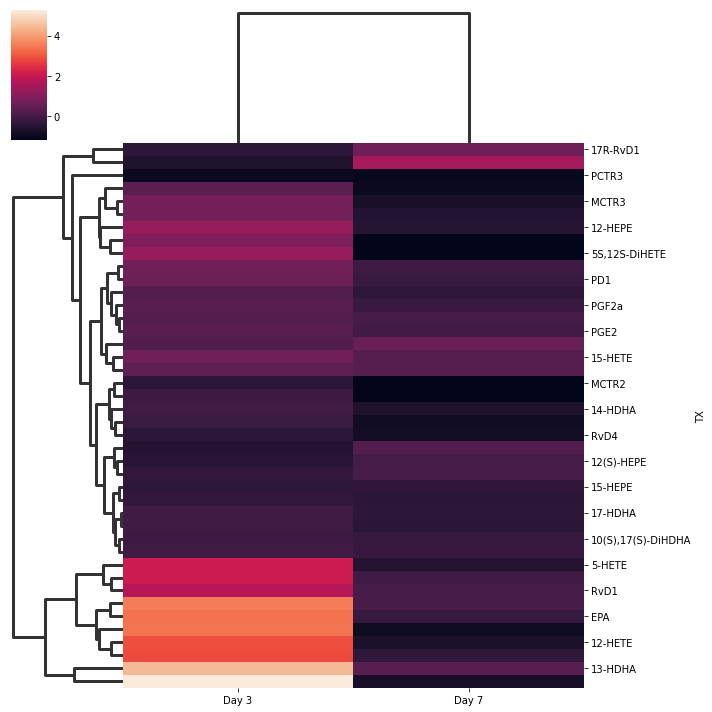

In [15]:
rvgelVSip_log=pd.read_excel(r'C:\Users\frank\Dropbox (University of Oregon)\Nature Materials AT-RvD1 Manuscript\Analysis\Lipidomics Analysis.xlsx', sheet_name = 'rvgel log norm to IP', index_col = 0)
rvgelVSip_log[['Day 3','Day 7']]
rvgelVSip_log_clust = sns.clustermap(rvgelVSip_log[['Day 3','Day 7']],tree_kws=dict(linewidths=3))

In [9]:
rvgelVSip_log_clust.dendrogram_row.reordered_ind

[10,
 26,
 30,
 25,
 28,
 36,
 2,
 9,
 14,
 18,
 34,
 41,
 33,
 12,
 32,
 35,
 8,
 13,
 27,
 39,
 5,
 29,
 37,
 23,
 1,
 31,
 7,
 15,
 11,
 24,
 0,
 38,
 16,
 19,
 40,
 6,
 21,
 22,
 3,
 20,
 4,
 17]

# PLSDA - Quad VML - Control Gel vs. AT-RvD1 Gel treatment

In [ ]:
#Import Day 3 analyte concentrations normalized to muscle mass
df_d3 = pd.read_excel(path\Lipidomics Analysis.xlsx', sheet_name = 'D3 pg per g muscle', index_col = 0)
#Import Day 7 analyte concentrations normalized to muscle mass
df_d7 = pd.read_excel(path\Lipidomics Analysis.xlsx', sheet_name = 'D7 pg per g muscle', index_col = 0)

In [5]:
df_d3 = df_d3.T[0:10].T
df_d7 = df_d7.T[0:10].T

In [6]:
#Assign column names to each sample
ttx = np.array(['Blank','Blank','Blank','Blank','Blank','AT-RvD1','AT-RvD1','AT-RvD1','AT-RvD1','AT-RvD1']).reshape(-1,1)

In [7]:

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import OneHotEncoder

#Use OneHotEncoder to convert categorical variables to binary array
ohe = OneHotEncoder(sparse = False)
y = ohe.fit_transform(ttx)

#Calculate zscore for day 3 and day 7 analyte concentrations separately
d3_zscore = zscore(df_d3, axis = 1, nan_policy = 'omit')
d7_zscore = zscore(df_d7, axis = 1, nan_policy = 'omit')

#Define and fit separate PLSDA models for day 3 and day 7 data
regr_d3 = PLSRegression(n_components = 10)
regr_d7 = PLSRegression(n_components = 10)
PLS_score_d3=regr_d3.fit(d3_zscore.T,y)
PLS_score_d7=regr_d7.fit(d7_zscore.T,y)
PLS_loads_d3=regr_d3.x_loadings_
PLS_loads_d7=regr_d7.x_loadings_

C:\Users\frank\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 9
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\frank\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 9
  warnings.warn(f"Y residual is constant at iteration {k}")


In [35]:
#calculate explained variance for each latent variable in day 3 PLSDA model
total_variance_in_x = np.var(d3_zscore, axis = 1)
variance_in_x = np.var(regr_d3.x_scores_, axis = 0) 
print('PLSDA variance: ', variance_in_x)
fractions_of_explained_variance = variance_in_x / sum(total_variance_in_x)
print('Day 3 explained variance ratio: ', fractions_of_explained_variance)



PLSDA variance:  [6.81039638 4.78924776 3.74204363 1.88774456 4.08967611 3.06342244
 2.49935142 1.82967645 2.36649225 0.        ]
Day 3 explained variance ratio:  [0.16215229 0.11402971 0.08909628 0.0449463  0.09737324 0.07293863
 0.05950837 0.04356372 0.05634505 0.        ]


In [34]:
#calculate explained variance for each latent variable in day 7 PLSDA model
total_variance_in_x = np.var(d7_zscore, axis = 1)
variance_in_x = np.var(regr_d7.x_scores_, axis = 0) 
print('PLSDA variance: ', variance_in_x)
fractions_of_explained_variance = variance_in_x / sum(total_variance_in_x)
print('Day 7 explained variance ratio: ', fractions_of_explained_variance)


PLSDA variance:  [5.97130799 6.12797556 2.8816718  3.64858078 1.03498592 3.96561341
 2.63767123 3.54147819 2.08829088 0.        ]
Day 3 explained variance ratio:  [0.142174   0.14590418 0.06861123 0.08687097 0.02464252 0.09441937
 0.0628017  0.08432091 0.04972121 0.        ]


In [6]:
#Show day 3 analyte loadings on LV1 and LV2
d3_loadings = pd.DataFrame(PLS_score_d3.x_loadings_, columns=['PLSDA1','PLSDA2'] )
d3_loadings.index = df_d3.index
d3_loadings

,PLSDA1,PLSDA2
TX,,
"10(S),17(S)-DiHDHA",-0.021160,-0.153035
12(S)-HEPE,-0.250915,-0.253547
12-HEPE,-0.245617,-0.217170
12-HETE,-0.286500,-0.198702
13-HDHA,-0.022759,-0.096631
14-HDHA,-0.235348,-0.263311
15R-LXA4,-0.207837,0.189339
15-HEPE,-0.083926,-0.134783
15-HETE,-0.155712,0.028693


In [7]:
#Show day 7 analyte loadings on LV1 and LV2
d7_loadings = pd.DataFrame(PLS_score_d7.x_loadings_, columns=['PLSDA1','PLSDA2'] )
d7_loadings.index = df_d7.index
d7_loadings

,PLSDA1,PLSDA2
TX,,
"10(S),17(S)-DiHDHA",0.050480,-0.041427
12(S)-HEPE,0.262535,-0.161511
12-HEPE,0.241242,-0.271079
12-HETE,0.226301,-0.279703
13-HDHA,-0.128700,0.113165
14-HDHA,0.043861,-0.223397
15R-LXA4,0.144908,-0.179663
15-HEPE,0.072303,0.036528
15-HETE,0.227766,-0.287620


In [8]:
#create dataframes for each sample's x scores on LV1 and LV2 at day 3 and day 7
df_PLSscore_d3 = pd.DataFrame(regr_d3.x_scores_, columns = ['PLS1', 'PLS2'])
df_PLSscore_d7 = pd.DataFrame(regr_d7.x_scores_, columns = ['PLS1', 'PLS2'])

df_PLSscore_d3 = pd.concat([pd.DataFrame(ttx, columns=['timepoint']), df_PLSscore_d3], axis=1)
df_PLSscore_d7 = pd.concat([pd.DataFrame(ttx, columns = ['timepoint']), df_PLSscore_d7], axis=1)
df_PLSscore_d3

,timepoint,PLS1,PLS2
0,Blank,-4.069959,-2.007287
1,Blank,1.509621,4.583460
2,Blank,-0.782320,2.806855
3,Blank,-1.773708,-0.891177
4,Blank,-4.374743,1.253726
5,AT-RvD1,1.401973,-1.258190
6,AT-RvD1,2.921834,-0.755550
7,AT-RvD1,3.591912,-1.819100
8,AT-RvD1,-0.139289,-2.587075
9,AT-RvD1,1.714679,0.674339


In [9]:
df_PLSscore_d7

,timepoint,PLS1,PLS2
0,Blank,1.263002,3.347667
1,Blank,5.109726,-3.356356
2,Blank,-0.220990,3.736323
3,Blank,0.680946,1.596526
4,Blank,3.064180,0.170801
5,AT-RvD1,-0.660360,-1.565418
6,AT-RvD1,-2.000272,1.719196
7,AT-RvD1,-2.266005,-2.408986
8,AT-RvD1,-2.182332,0.084853
9,AT-RvD1,-2.787895,-3.324604


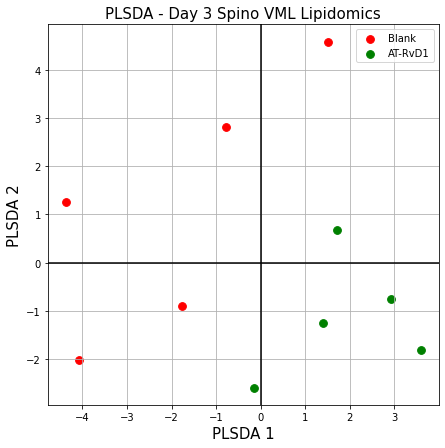

In [10]:
#Plot day 3 x scores
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot() 
ax.set_xlabel('PLSDA 1', fontsize = 15)
ax.set_ylabel('PLSDA 2', fontsize = 15)
ax.set_title('PLSDA - Day 3 Spino VML Lipidomics', fontsize = 15)

#ax.set_title('Blank vs. Resolvin PCA', fontsize = 20)
targets = ['Blank', 'AT-RvD1']
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = df_PLSscore_d3['timepoint'] == target
    ax.scatter(df_PLSscore_d3.loc[indicesToKeep, 'PLS1']
               , df_PLSscore_d3.loc[indicesToKeep, 'PLS2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

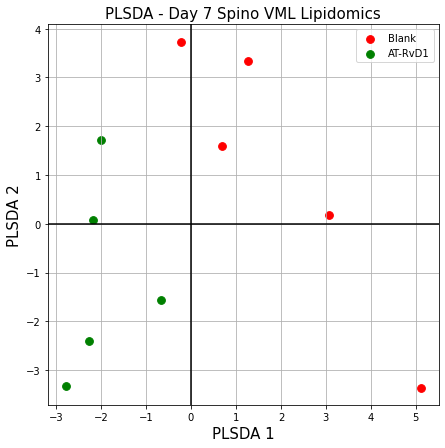

In [50]:
#Plot day 7 x scores
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot() 
ax.set_xlabel('PLSDA 1', fontsize = 15)
ax.set_ylabel('PLSDA 2', fontsize = 15)
ax.set_title('PLSDA - Day 7 Spino VML Lipidomics', fontsize = 15)

#ax.set_title('Blank vs. Resolvin PCA', fontsize = 20)
targets = ['Blank', 'AT-RvD1']
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = df_PLSscore_d7['timepoint'] == target
    ax.scatter(df_PLSscore_d7.loc[indicesToKeep, 'PLS1']
               , df_PLSscore_d7.loc[indicesToKeep, 'PLS2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')